In [1]:
from threading import Lock
import warnings
import matplotlib.pyplot as plt
import pyximport
from tqdm import tnrange, tqdm_notebook

warnings.filterwarnings('ignore')

import sys
import os

sys.path.insert(0, os.path.join(os.getcwd(), os.pardir))
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

pyximport.install(setup_args={"include_dirs": np.get_include()})
import XXZZham as XXZZham
from XXZZham import add_high_energies, rotate_to_00_base
import random
import adiabatic_sim as asim
import time

import multiprocessing
import ctypes
mkl_rt = ctypes.CDLL('libmkl_rt.so')
mkl_get_max_threads = mkl_rt.mkl_get_max_threads
mkl_rt.mkl_set_num_threads(ctypes.byref(ctypes.c_int(multiprocessing.cpu_count())))
import os
import LH_tools as LHT

%precision %.15f
PRECISION  = 2 ** -40

from IPython.display import display
import FD_tools as FDT

In [2]:
def _simulate_time_p_and_pfab_repeat(repeats: int, T: float, steps: int, psi0: Qobj, psi1: Qobj, H0: Qobj, H1: Qobj):

    """
        Callback for simulation of fowrard and backword propagation
    :param T:
    :param steps:
    :param psi0:
    :param psi1:
    :param H0:
    :param H1:
    :return:
    """
    tlist = np.linspace(0, T, steps)
    backprop_t, prop_t = FDT.create_back_and_forward_props(tlist, H0, H1)
    psi_forward = prop_t * psi0
    
    psi_repeat = (backprop_t*prop_t)**repeats * psi0
    
    Pf0 = abs(psi1.overlap(psi_forward)) ** 2
    Prepeat = abs(psi0.overlap(psi_repeat)) ** 2
    return T, Pf0, Prepeat

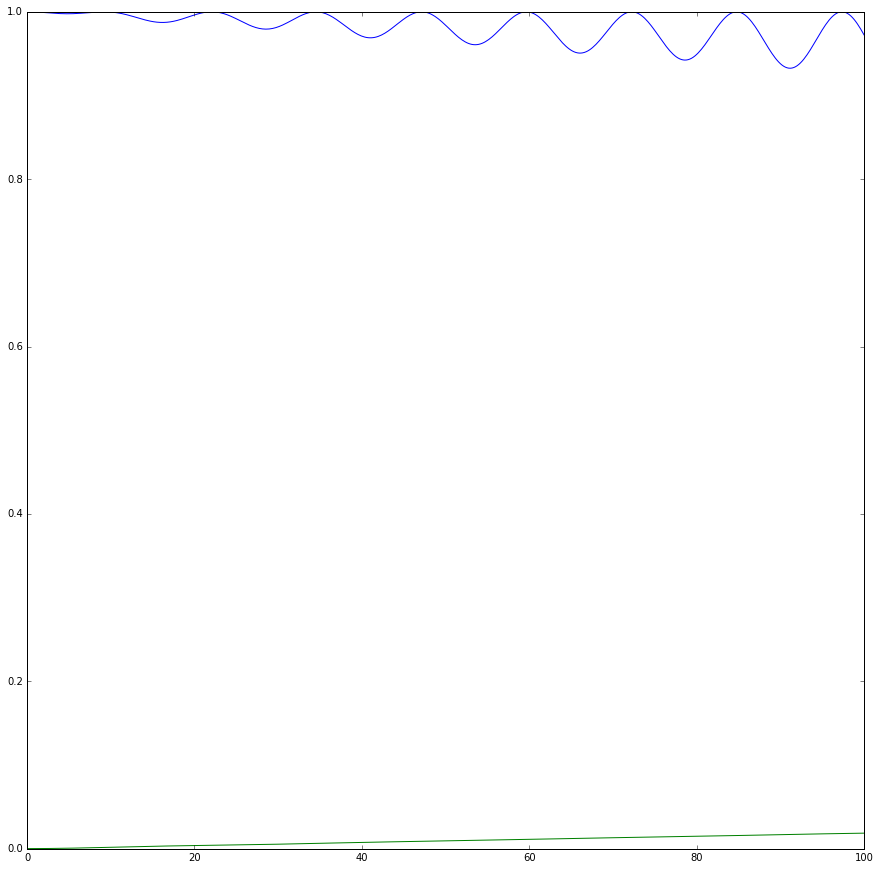

In [3]:
from concurrent.futures import ThreadPoolExecutor,as_completed
H0n,H1n,psi0n = FDT.prepare_groverlike_system(10)
executor = ThreadPoolExecutor(48)
tasks = []
plt.figure(figsize=(15,15))

H0n,H1n,psi0n = FDT.prepare_groverlike_system(12)
executor = ThreadPoolExecutor(48)
tasks = []
plt.figure(figsize=(15,15))
final_times = np.linspace(0.1, 100, 500)
for T in final_times: 
    tasks.append(
        executor.submit(
            _simulate_time_p_and_pfab_repeat,1, T, max(T*5,50) , psi0n, basis(2,0) , H0n, H1n)
    )
results = [simulation.result() for simulation in as_completed(tasks)]
results.sort()
A = np.array(results)
plt.plot(A[0:,0],A[0:,2])

    
plt.plot(A[0:,0],A[0:,1])
plt.show()

In [7]:
LHT.SendMail("Done 12Q initial recon","25.7.17 repeated more accurate")

Find local minima and see how they behave

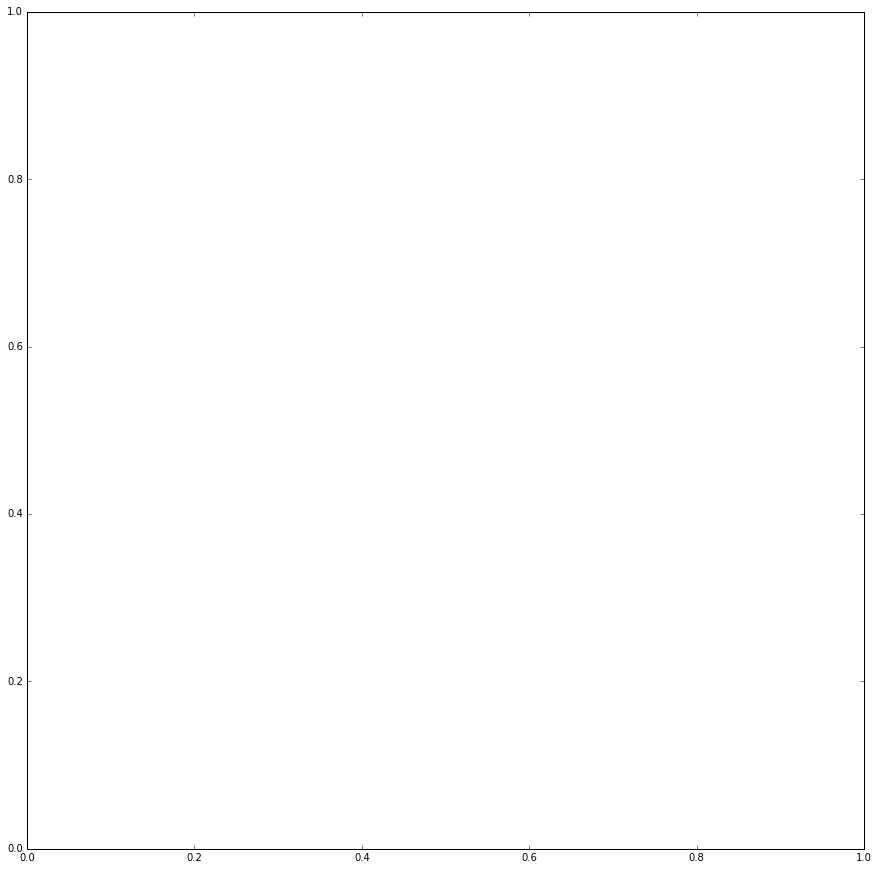

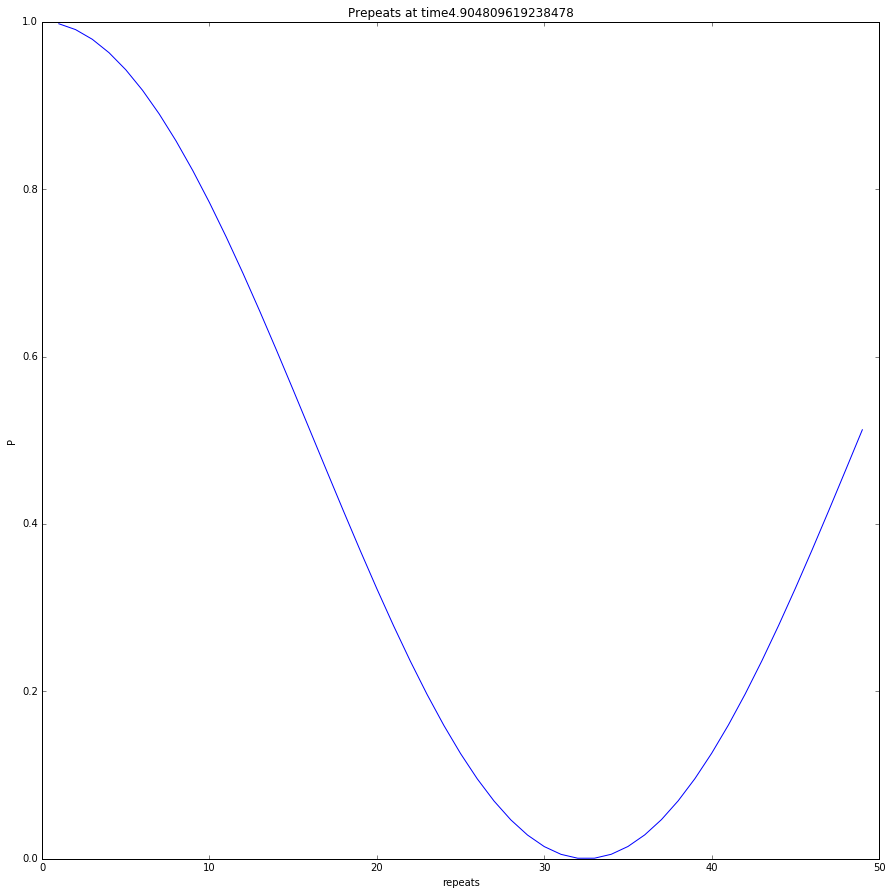

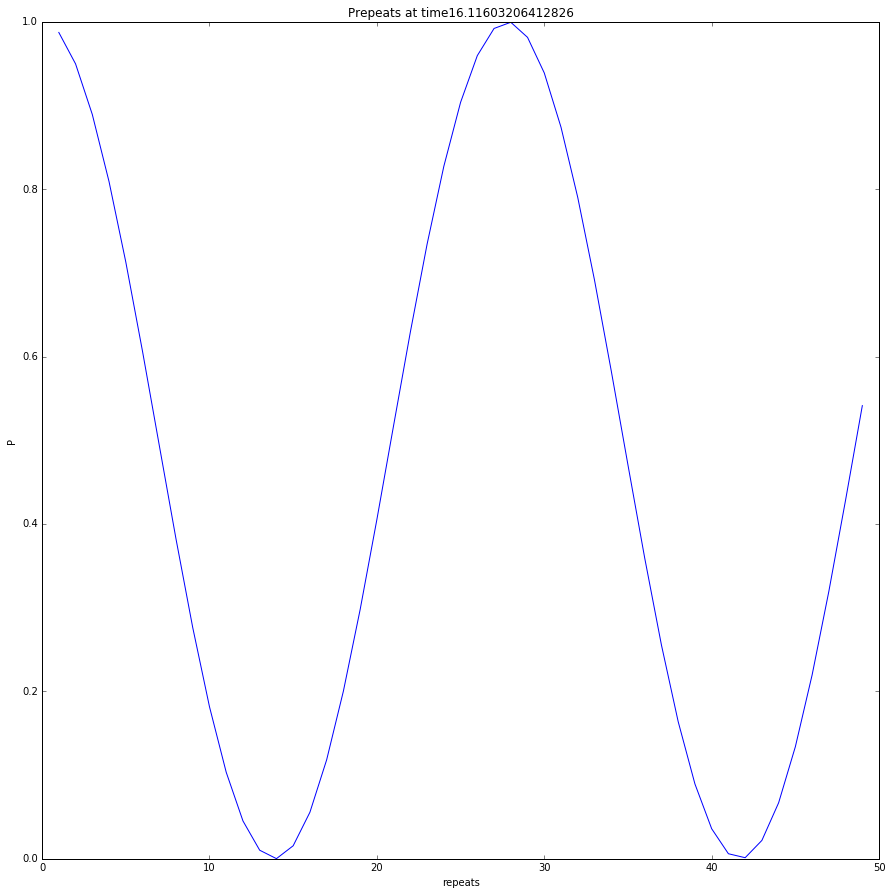

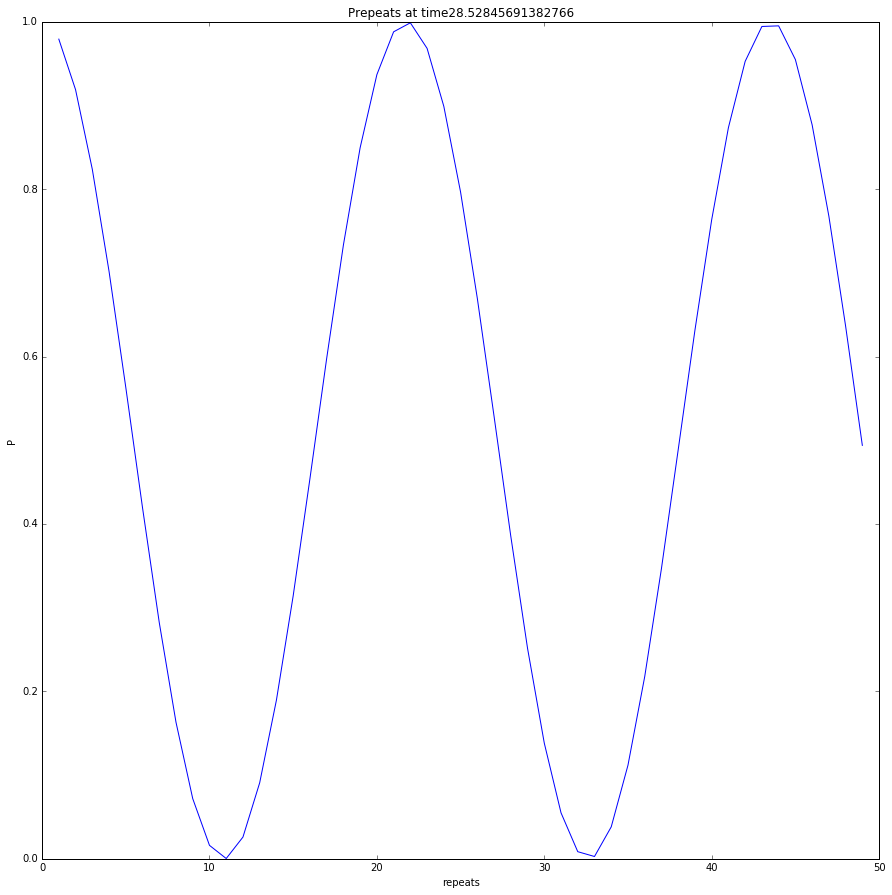

KeyboardInterrupt: 

In [19]:
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

local_minimas = argrelextrema(A[0:,2], np.less)
Prepeats_array = []
for minima in local_minimas[0]:
    Prepeats = []
    for repeats in (range(1,50)):
        minima_time = final_times[minima]
        _,_, Prepeat = _simulate_time_p_and_pfab_repeat(repeats, minima_time, max(minima_time*5,50), psi0n, basis(2,0), H0n, H1n)
        Prepeats.append(Prepeat)
    Prepeats_array.append(Prepeats)
    plt.figure(figsize=(15,15))
    plt.plot(range(1,50), Prepeats)
    plt.title("Prepeats at time{}".format(minima_time))
    plt.xlabel("repeats")
    plt.ylabel("P")
    plt.show()
    
    

        

In [26]:
[print (1-Pr) for Pr in Prepeats_array[0]]

0.00233480404964
0.00931740846268
0.020882593722
0.0369223376982
0.0572868246069
0.0817858443312
0.110190569038
0.142235690496
0.177621898129
0.216018674663
0.257067383253
0.300384617251
0.345565781333
0.392188870539
0.439818411916
0.48800953196
0.536312111863
0.58427499175
0.63145018464
0.677397060774
0.721686463222
0.763904716332
0.803657489575
0.840573480709
0.874307883847
0.90454561004
0.931004230299
0.953436613564
0.971633234976
0.985424132899
0.994680496414
0.999315868444
0.999286953293
0.994594021036
0.985280904998
0.971434592342
0.953184411576
0.930700824596
0.904193834517
0.873911024188
0.840135243697
0.803181968468
0.763396352633
0.721150005193
0.676837519086
0.630872785572
0.583685128374
0.535715293671
0.487411333404


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [35]:
1-0.00233480404964 * 1/2**15

0.999999928747435

0.159864756303224

# 26/7/17 graph behaviour

In [45]:
for n in range(3,20):
    H0n,H1n,psi0n = FDT.prepare_groverlike_system(n)
    executor = ThreadPoolExecutor(48)
    tasks = []
    final_times = np.linspace(0.1, 50, 100)
    for T in final_times: 
        tasks.append(
            executor.submit(
                _simulate_time_p_and_pfab_repeat,1, T, max(T*5,50) , psi0n, basis(2,0) , H0n, H1n)
        )
    results = [simulation.result() for simulation in as_completed(tasks)]
    results.sort()
    A = np.array(results)
    
    local_minimas = argrelextrema(A[0:,2], np.less)
    first_minima = local_minimas[0][0]
    minima_time = final_times[first_minima]
    print ("{} Qubits, Minima time = {} ".format(n, minima_time))
    for repeats in (range(1,1000)):        
        _,_, Prepeat = _simulate_time_p_and_pfab_repeat(repeats, minima_time, max(minima_time*5,50), psi0n, basis(2,0), H0n, H1n)
        if Prepeat < 1/10:
            total_time = repeats*2*minima_time
            print("\t\t{} repeats for precision 90%, total time is {}".format(repeats, total_time))
            break


3 Qubits, Minima time = 4.132323232323232 
		8 repeats for precision 90%, total time is 66.11717171717171
4 Qubits, Minima time = 4.636363636363637 
		2 repeats for precision 90%, total time is 18.545454545454547
5 Qubits, Minima time = 4.636363636363637 
		3 repeats for precision 90%, total time is 27.81818181818182
6 Qubits, Minima time = 4.636363636363637 
		4 repeats for precision 90%, total time is 37.09090909090909
7 Qubits, Minima time = 4.636363636363637 
		5 repeats for precision 90%, total time is 46.36363636363637
8 Qubits, Minima time = 4.636363636363637 
		7 repeats for precision 90%, total time is 64.9090909090909
9 Qubits, Minima time = 4.636363636363637 
		10 repeats for precision 90%, total time is 92.72727272727273
10 Qubits, Minima time = 4.636363636363637 
		14 repeats for precision 90%, total time is 129.8181818181818
11 Qubits, Minima time = 4.636363636363637 
		19 repeats for precision 90%, total time is 176.1818181818182
12 Qubits, Minima time = 4.63636363636363

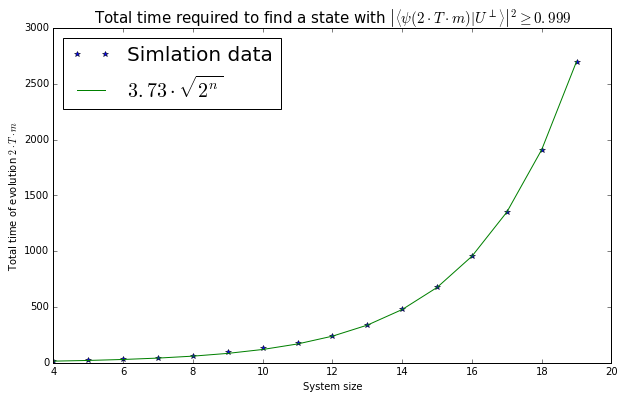

In [245]:
Q = list(range(4,20))
minTime = [18.545454545454547,27.81818181818182,37.09090909090909,46.36363636363637,64.9090909090909, 92.72727272727273, 129.8181818181818, 176.1818181818182, 241.09090909090912, 343.0909090909091, 482.18181818181824, 676.909090909091,  955.0909090909091,  1353.818181818182,  1910.1818181818182,  2698.3636363636365]

plt.figure(figsize=(10,6))
plt.plot(Q,minTime,'*')
plt.plot(Q,np.sqrt(np.power(2,Q))*3.73)
plt.legend(("Simlation data", r"$3.73 \cdot \sqrt{2^n}$"), fontsize='20',loc=2)
plt.xlabel("System size")
plt.ylabel("Total time of evolution $2\cdot T \cdot m$")
plt.title(r"Total time required to find a state with $\left|\left<\psi(2\cdot T \cdot m)|U^\perp \right>\right|^2 \geq 0.999$", fontsize='15')
plt.show()


8

In [ ]:
to_print = []
for n in range(3,20):
    H0n,H1n,psi0n = FDT.prepare_groverlike_system(n)
    executor = ThreadPoolExecutor(48)
    tasks = []
    final_times = np.linspace(0.1, 50, 100)
    for T in final_times: 
        tasks.append(
            executor.submit(
                _simulate_time_p_and_pfab_repeat,1, T, max(T*5,50) , psi0n, basis(2,0) , H0n, H1n)
        )
    results = [simulation.result() for simulation in as_completed(tasks)]
    results.sort()
    A = np.array(results)
    
    local_minimas = argrelextrema(A[0:,2], np.less)
    first_minima = local_minimas[0][0]
    minima_time = final_times[first_minima]
    to_print.append ("{} Qubits, Minima time = {} ".format(n, minima_time))
    for repeats in (range(1,1000)):        
        _,_, Prepeat = _simulate_time_p_and_pfab_repeat(repeats, minima_time, max(minima_time*5,50), psi0n, basis(2,0), H0n, H1n)
        if Prepeat < 1/200:
            total_time = repeats*2*minima_time
            to_print.append("\t\t{} repeats for precision 90%, total time is {}".format(repeats, total_time))
            break


In [ ]:
for line in to_print :
    print(line)

In [ ]:
n = 10
H0n,H1n,psi0n = FDT.prepare_groverlike_system(n)
executor = ThreadPoolExecutor(48)
tasks = []
final_times = np.linspace(1, 105, 4000)
for T in final_times: 
    tasks.append(
        executor.submit(
            _simulate_time_p_and_pfab_repeat,1, T, max(T*5,50) , psi0n, basis(2,0) , H0n, H1n)
    )
results = [simulation.result() for simulation in as_completed(tasks)]
results.sort()
A = np.array(results)

In [96]:
local_minimas = argrelextrema(A[0:,2], np.less)
minima_time = final_times[first_minima]
print(final_times[local_minimas])

[   4.81718172   16.08150815   28.40674067   40.7839784    53.2340234
   65.66326633   78.13411341   90.56335634  103.03420342]


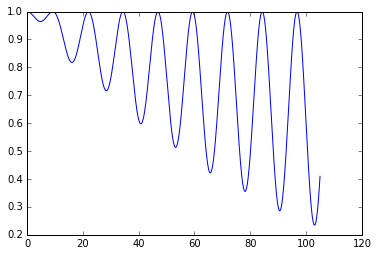

In [97]:
plt.plot(final_times,A[0:,2])
plt.show()

In [98]:
np.diff(final_times[local_minimas])

array([ 11.26432643,  12.32523252,  12.37723772,  12.450045  ,
        12.42924292,  12.47084708,  12.42924292,  12.47084708])

In [99]:
local_maxima = argrelextrema(A[0:,2], np.greater )
np.diff(final_times[local_maxima])

array([ 12.81408141,  12.37723772,  12.54365437,  12.42924292,
        12.50205021,  12.450045  ,  12.48124812])

In [138]:
from scipy.special import gamma 
from numpy import log, pi, angle as arg


n =10
T = 4.81718172
delta = n**-n*T*0.72/(2*pi)
stockes_phase = np.pi/4 + delta*(log(delta)-1) + arg(gamma(1-1j*delta))

In [139]:
stockes_phase 

0.785398162070264

In [124]:
4.81718172/2-pi/4

1.623192696602552

In [125]:
pi/2

1.570796326794897

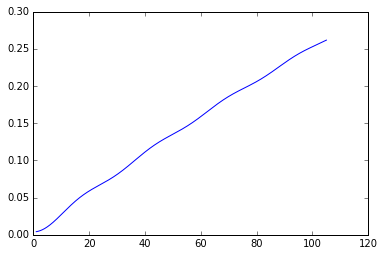

In [127]:
plt.plot(final_times,A[0:,1])
plt.show()

In [137]:
1/2**6

0.015625000000000

# 2.8.17 check if the size 4.81718172 is related to the system size

In [144]:
for n in range(3,10):
    H0n,H1n,psi0n = FDT.prepare_groverlike_system(n)
    executor = ThreadPoolExecutor(48)
    tasks = []
    final_times = np.linspace(1, 6, 100)
    for T in final_times: 
        tasks.append(
            executor.submit(
                _simulate_time_p_and_pfab_repeat,1, T, max(T*5,50) , psi0n, basis(2,0) , H0n, H1n)
        )
    results = [simulation.result() for simulation in as_completed(tasks)]
    results.sort()
    A = np.array(results)
    
    local_minimas = argrelextrema(A[0:,2], np.less)
    first_minima = local_minimas[0][0]
    minima_time = final_times[first_minima]
    print ("{} Qubits, Minima time = {} ".format(n, minima_time))


3 Qubits, Minima time = 4.232323232323232 
4 Qubits, Minima time = 4.5353535353535355 
5 Qubits, Minima time = 4.686868686868687 
6 Qubits, Minima time = 4.737373737373737 
7 Qubits, Minima time = 4.787878787878787 
8 Qubits, Minima time = 4.838383838383838 
9 Qubits, Minima time = 4.838383838383838 


In [145]:
for n in range(9,15):
    H0n,H1n,psi0n = FDT.prepare_groverlike_system(n)
    executor = ThreadPoolExecutor(48)
    tasks = []
    final_times = np.linspace(4.5, 5.5, 100)
    for T in final_times: 
        tasks.append(
            executor.submit(
                _simulate_time_p_and_pfab_repeat,1, T, max(T*5,50) , psi0n, basis(2,0) , H0n, H1n)
        )
    results = [simulation.result() for simulation in as_completed(tasks)]
    results.sort()
    A = np.array(results)
    
    local_minimas = argrelextrema(A[0:,2], np.less)
    first_minima = local_minimas[0][0]
    minima_time = final_times[first_minima]
    print ("{} Qubits, Minima time = {} ".format(n, minima_time))


9 Qubits, Minima time = 4.8232323232323235 
10 Qubits, Minima time = 4.833333333333333 
11 Qubits, Minima time = 4.833333333333333 
12 Qubits, Minima time = 4.833333333333333 
13 Qubits, Minima time = 4.843434343434343 
14 Qubits, Minima time = 4.843434343434343 


In [164]:



def create_back_and_forward_props_constant_dt(tlist, H_0, H_1):
    """

    Creates a back and forwared propagators
    :param tlist:
    :param H_0:
    :param H_1:
    :return:
    """
    dt = abs(tlist[0]-tlist[1])
    n = len(H_0.dims[0])
    prop = tensor([qeye(2)] * n)
    tmax = max(tlist)
    last_time = 0
    total_phase = 0
    for time in tlist:
        s = time / tmax
        if(s>1/2):
            hs_energies = Hs.eigenenergies(eigvals=2)
            total_phase += hs_energies[1] - hs_energies[0]
        Hs = H_0 * (1 - s) + H_1 * s
        U = (-1j * Hs * dt).expm()
        prop = U * prop
        last_time = time
    backprop = tensor([qeye(2)] * n)
    for time in tlist[:-1]:
        if(s>1/2):
            hs_energies = Hs.eigenenergies(eigvals=2)
            total_phase += hs_energies[1] - hs_energies[0]
        s = time / tmax
        Hs = H_0 * (s) + H_1 * (1 - s)
        U = (-1j * Hs * dt).expm()
        backprop = U * backprop
        last_time = time
    return backprop, prop, total_phase*dt


def _simulate_time_p_and_pfab_double_last(T: float, steps: int, psi0: Qobj, psi1: Qobj, H0: Qobj, H1: Qobj):

    """
        Callback for simulation of fowrard and backword propagation
    :param T:
    :param steps:
    :param psi0:
    :param psi1:
    :param H0:
    :param H1:
    :return:
    """
    tlist = np.linspace(0, T, steps)
    backprop_t, prop_t,total_phase_after_half = create_back_and_forward_props_constant_dt(tlist, H0, H1)
    psi_forward = prop_t * psi0
    psi_fab = backprop_t * psi_forward
    Pf0 = abs(psi1.overlap(psi_forward)) ** 2
    Pfab = abs(psi0.overlap(psi_fab)) ** 2
    return T, Pf0, Pfab, total_phase_after_half

In [165]:
for n in range(9,15):
    H0n,H1n,psi0n = FDT.prepare_groverlike_system(n)
    executor = ThreadPoolExecutor(48)
    tasks = []
    final_times = np.linspace(4.5, 5.5, 100)
    for T in final_times: 
        tasks.append(
            executor.submit(
                _simulate_time_p_and_pfab_double_last, T, max(T*5,50) , psi0n, basis(2,0) , H0n, H1n)
        )
    results = [simulation.result() for simulation in as_completed(tasks)]
    results.sort()
    A = np.array(results)
    
    local_minimas = argrelextrema(A[0:,2], np.less)
    first_minima = local_minimas[0][0]
    first_minima_phase_after_half = A[0:,3][first_minima]
    minima_time = final_times[first_minima]
    print ("{} Qubits, Minima time = {} with after half phase ={}".format(n, minima_time, first_minima_phase_after_half))


9 Qubits, Minima time = 4.641414141414142 with after half phase =2.2515533520204074
10 Qubits, Minima time = 4.641414141414142 with after half phase =2.2431274807587473
11 Qubits, Minima time = 4.651515151515151 with after half phase =2.243220000803989
12 Qubits, Minima time = 4.651515151515151 with after half phase =2.2405685780962723
13 Qubits, Minima time = 4.651515151515151 with after half phase =2.239140500817541
14 Qubits, Minima time = 4.651515151515151 with after half phase =2.238390735354533


In [166]:
for n in range(9,15):
    H0n,H1n,psi0n = FDT.prepare_groverlike_system(n)
    executor = ThreadPoolExecutor(48)
    tasks = []
    final_times = np.linspace(4.5, 5.5, 100)
    for T in final_times: 
        tasks.append(
            executor.submit(
                _simulate_time_p_and_pfab_double_last, T, 150 , psi0n, basis(2,0) , H0n, H1n)
        )
    results = [simulation.result() for simulation in as_completed(tasks)]
    results.sort()
    A = np.array(results)
    
    local_minimas = argrelextrema(A[0:,2], np.less)
    first_minima = local_minimas[0][0]
    first_minima_phase_after_half = A[0:,3][first_minima]
    minima_time = final_times[first_minima]
    print ("{} Qubits, Minima time = {} with after half phase ={}".format(n, minima_time, first_minima_phase_after_half))


9 Qubits, Minima time = 4.762626262626263 with after half phase =2.3682007275372663
10 Qubits, Minima time = 4.7727272727272725 with after half phase =2.365224921715061
11 Qubits, Minima time = 4.7727272727272725 with after half phase =2.3606950504045874
12 Qubits, Minima time = 4.7727272727272725 with after half phase =2.3581551298109975
13 Qubits, Minima time = 4.7727272727272725 with after half phase =2.3567433431565283
14 Qubits, Minima time = 4.7727272727272725 with after half phase =2.355966595004231


In [167]:
for n in range(3,9):
    H0n,H1n,psi0n = FDT.prepare_groverlike_system(n)
    executor = ThreadPoolExecutor(48)
    tasks = []
    final_times = np.linspace(3, 7, 100)
    for T in final_times: 
        tasks.append(
            executor.submit(
                _simulate_time_p_and_pfab_double_last, T, 150 , psi0n, basis(2,0) , H0n, H1n)
        )
    results = [simulation.result() for simulation in as_completed(tasks)]
    results.sort()
    A = np.array(results)
    
    local_minimas = argrelextrema(A[0:,2], np.less)
    first_minima = local_minimas[0][0]
    first_minima_phase_after_half = A[0:,3][first_minima]
    minima_time = final_times[first_minima]
    print ("{} Qubits, Minima time = {} with after half phase ={}".format(n, minima_time, first_minima_phase_after_half))


3 Qubits, Minima time = 4.171717171717171 with after half phase =2.482163447942071
4 Qubits, Minima time = 4.454545454545455 with after half phase =2.4577533613192193
5 Qubits, Minima time = 4.616161616161616 with after half phase =2.436496534825435
6 Qubits, Minima time = 4.696969696969697 with after half phase =2.412645221271727
7 Qubits, Minima time = 4.737373737373737 with after half phase =2.3932531635828673
8 Qubits, Minima time = 4.737373737373737 with after half phase =2.36948645669849


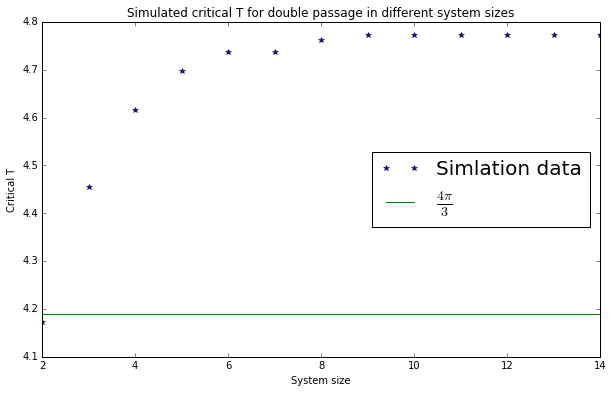

In [190]:
Tcrit = [
    4.171717171717171, 4.454545454545455, 4.616161616161616, 4.696969696969697,
    4.737373737373737, 4.737373737373737, 4.762626262626263,
    4.7727272727272725, 4.7727272727272725, 4.7727272727272725,
    4.7727272727272725, 4.7727272727272725, 4.7727272727272725
]
Q = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
plt.figure(figsize=(10,6))

plt.plot(Q, Tcrit,'*')
plt.plot(Q,np.ones(len(Q))* pi*4/3)

plt.legend(("Simlation data", r"$\frac{4\pi}{3}$"), fontsize='20',loc=7)
plt.xlabel("System size")
plt.ylabel("Critical T")
plt.title("Simulated critical T for double passage in different system sizes")
plt.show()

In [ ]:
2.356194490192345
In [ ]:


# 3/8/17 14 Qubits simulation 

In [251]:
to_print = []
n = 14 
H0n,H1n,psi0n = FDT.prepare_groverlike_system(n)
executor = ThreadPoolExecutor(48)
tasks = []
T = 4.7727272727272725
Prepeats10 = []
for repeats in (range(1,200)):
    _,_, Prepeat = _simulate_time_p_and_pfab_repeat(repeats, minima_time, max(minima_time*5,50), psi0n, basis(2,0), H0n, H1n)
    Prepeats10.append(Prepeat)
    print(Prepeat)

0.999411844795
0.997648762916
0.994714902313
0.990617165394
0.985365192785
0.978971340648
0.97145065161
0.962820819376
0.953102147098
0.942317499612
0.930492249642
0.917654218104
0.903833608661
0.889062936652
0.873376952606
0.856812560475
0.839408730819
0.821206409118
0.802248419438
0.782579363685
0.76224551667
0.741294717237
0.719776255717
0.697740757962
0.675240066242
0.652327117272
0.629055817676
0.605480917156
0.581657879689
0.557642753035
0.533492036878
0.509262549899
0.4850112961
0.460795330694
0.436671625872
0.412696936765
0.388927667922
0.365419740602
0.342228461217
0.319408391208
0.297013218684
0.27509563211
0.253707196348
0.232898231344
0.212717693737
0.193213061687
0.174430223168
0.156413368013
0.139204883949
0.12284525687
0.107372975592
0.0928244412944
0.0792338818883
0.0666332714835
0.0550522551661
0.0445180792531
0.035055527191
0.026686861248
0.0194317701388
0.0133073227034
0.00832792774927
0.00450530015281
0.0018484332977
0.000363577916603
5.4227385158e-05
0.000921109503

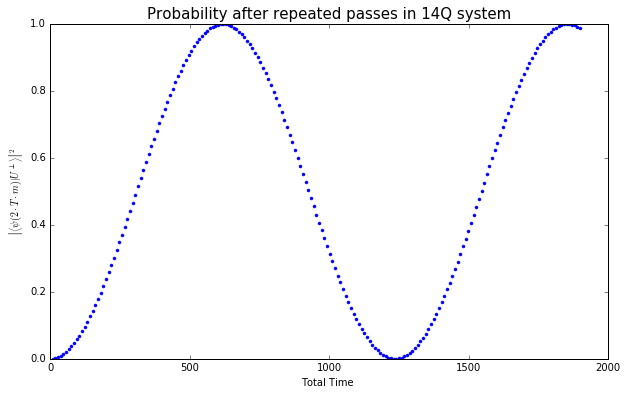

In [274]:


plt.figure(figsize=(10,6))
plt.xlabel("Total Time ")
plt.ylabel(r"$\left|\left<\psi(2\cdot T \cdot m)|U^\perp \right>\right|^2$")
plt.title(r"Probability after repeated passes in 14Q system", fontsize='15')

plt.plot(np.array(range(1,200))*2*4.772727,1-np.array(Prepeats10),'.')
plt.show()

In [273]:
range(1,200)[argrelextrema(np.array(Prepeats10),np.less)[0][0]]*2*4.772727

620.454509999999914